# Project: Stack Overflow Annual Developer Survey Data Analysis
---
## Data Description
---
Founded back in 2008, Stack Overflow's public platform has become an indispensable resource for nearly every coder, enabling them to learn, share knowledge, collaborate, and shape their professional journeys. For almost ten years, Stack Overflow has conducted the world's largest annual Developer Survey, reaching out to coders across the globe. These surveys yield a valuable, open-access dataset that serves as a powerful resource for performing in-depth analyses. By delving into this dataset, we gain the capability to explore and address real-world questions and challenges through comprehensive and rigorous data analysis.
In this project we analysed 2022 Stackoverflow survey dataset.
In 2022 survey, over 70,000 developers told Stack Overflow how they learn and level up, which tools they’re using, and what they want. 

## Data Source
---
The data files in .csv format for each of the annual developer surveys conducted since 2011 can be accessed for download here:
- https://insights.stackoverflow.com/survey

Insights provided by StackOverflow can be found here:
- https://survey.stackoverflow.co/2022

## Research Questions
---


> 1. What additional responsibilities do Data Scientists commonly take on in their current positions?
>
> 2. Which programming languages are most frequently utilized by Data Scientists?
>
>3. Is there a correlation between holding a Doctorate degree and earning a higher salary?
>
>4. Which programming languages are in high demand among Data Scientists, both currently and for the future? Are there any languages gaining increased popularity?
>
>5. Is there a gender-based salary disparity among developers, with male developers earning higher salaries than their female counterparts?
>

## Key Results
---
Here are some key takeaways from the analysis carried out in this project.
> __The United States of America__ stands out as the country with the highest number of survey responses (__25.2%__). The top 5 countries, ranked by the number of survey respondents, are as follows: United States of America, Germany, United Kingdom of Great Britain and Northern Ireland, India, Canada.
>
> Majority of the StackOverflow survey respondents in 2022 are male (__92.41%__). Percentage of female respondents and other respondents (non-binary, genderqueer, or gender non-conforming etc) are (__5.19%__) and (__2.4%__), respectively. 
> Percentage of female respondents is very low (upto __6.02%__ for USA) for the top 5 countries with largest number of respondents. 
USA, Canada, UK, India and Germany are the countries with largest number of respondents. Partcipants on the survey is dominated by male respondents, as percentage of female respondents are extremely low. Percentage of female respondents for top 5 countries are given below: `USA`: 6.02%, `Canada`: 5.03%, `UK`: 5.02%, `India`: 4.29% and `Germany`: 3.51%.
>
>Median salary of male repondents is a bit higher than female respondents - __\$69,318__ and __\$65,412__, respectively.
>The median salary for developers with a bachelor's degree is __\$70,771__ , which is very similar to the median salary of developers with a master's degree, at __\$70,206__. In contrast, developers with a doctorate have the highest median salary, which is __\$87,948__. 
>__Data Scientist/ML Specialists__ have a higher median salary of __\$69,102__ than other developers  (__\$63,984__).
>
>Top 4 types of developers that respond to the survey are: Full-stack, back-end, front-end, and desktop developers.
>Some roles are correlated with other roles: such as [__`Academic researcher`,`Scientist`__] (__correlation 0.5__), [__`Cloud infrastructure engineer`,`DevOps specialist`__], (__correlation 0.4__), and [__`Database administrator`, `System administrator`__],  (__correlation 0.4__).
>
>__Data Scientist/ML Specialists__ typically perform few additional roles. 
>Most popular additional roles performed by Data Scientists or Machine Learning specialists are as follows: `Developer backend`: 33.49%, `Engineer data`: 28.13%, `Developer fullstack`: 24.69%, and `Data or business analyst`: 23.01%.
>
> __Python__ is by far the most popular language, used by __89.09%__ Data Scientists or Machine Learning specialists.
However, Data Scientists or Machine Learning specialists use more than 4 languages on average. 
Top 5 popular languages used by Data Scientists or Machine Learning specialists are as follows: `Python`: 89.09%, `SQL`: 57.59%, `Javascript`: 38.97%, `Bash shell`: 38.55%, and `HTML CSS`: 34.09%.
>
>__Rust__ is getting popular. It's among the top 5 popular languages that Data Scientists or Machine Learning specialists want to work with.
Top 5 popular languages Data Scientists or Machine Learning specialists want to work with are as follows: `Python`: 76.51%, `SQL`: 41.69%, `Javascript`: 30.36%, `Bash shell`: 25.66%, and `Rust`: 25.36%.



## Introduction [Introduction](#introduction)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
import matplotlib.patches as mpatches
import seaborn as sns
from itertools import chain
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time


### Load Dataset

In [2]:
df2022 = pd.read_csv('./data/survey_results_public_2022.csv')
df2022.shape

(73268, 79)

In [3]:
df2022.head(2)

ResponseId                      MainBranch           Employment  \
0           1                   None of these                  NaN   
1           2  I am a developer by profession  Employed, full-time   

     RemoteWork                          CodingActivities EdLevel LearnCode  \
0           NaN                                       NaN     NaN       NaN   
1  Fully remote  Hobby;Contribute to open-source projects     NaN       NaN   

  LearnCodeOnline LearnCodeCoursesCert YearsCode  ... TimeSearching  \
0             NaN                  NaN       NaN  ...           NaN   
1             NaN                  NaN       NaN  ...           NaN   

  TimeAnswering Onboarding ProfessionalTech TrueFalse_1 TrueFalse_2  \
0           NaN        NaN              NaN         NaN         NaN   
1           NaN        NaN              NaN         NaN         NaN   

  TrueFalse_3  SurveyLength SurveyEase ConvertedCompYearly  
0         NaN           NaN        NaN                 NaN  
1         NaN      Too long  Difficult                 NaN  

[2 rows x 79 columns]

In [4]:
df2022.shape

(73268, 79)

In [5]:
df2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

### Data Filtering - Sorting & Renaming

In [6]:
### Remove any column with all NaN rows.
columns_with_all_nan = df2022.columns[df2022.isna().all()]
columns_with_all_nan

Index(['VCHostingPersonal use', 'VCHostingProfessional use'], dtype='object')

In [7]:
df2022 = df2022.dropna(axis=1, how='all')
df2022.shape

(73268, 77)

In [8]:
# Selecting relevan columns
col = ['MainBranch','Employment','RemoteWork','CodingActivities','EdLevel','LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType','Country','LanguageHaveWorkedWith',
       'LanguageWantToWorkWith','MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith','PlatformHaveWorkedWith',
       'PlatformWantToWorkWith','ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith','NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm','Age', 'Gender','Ethnicity','WorkExp','Accessibility', 'MentalHealth', 'TBranch','Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Frequency_1',
       'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering',
       'Onboarding', 'ProfessionalTech', 'TrueFalse_1', 'TrueFalse_2',
       'TrueFalse_3','ConvertedCompYearly']

df = df2022[col]
df = df[df['Employment']=='Employed, full-time']
df.shape

(42962, 60)

In [9]:
df.rename(columns={'ConvertedCompYearly': 'SalaryUSD' }, inplace =True)

In [10]:
df.sort_index(axis=1).head(2)

Accessibility              Age        Blockchain  \
1                NaN              NaN  Very unfavorable   
2  None of the above  25-34 years old  Very unfavorable   

                           CodingActivities  \
1  Hobby;Contribute to open-source projects   
2                                     Hobby   

                                             Country  \
1                                             Canada   
2  United Kingdom of Great Britain and Northern I...   

                                             DevType  \
1                                                NaN   
2  Data scientist or machine learning specialist;...   

                                           EdLevel           Employment  \
1                                              NaN  Employed, full-time   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  Employed, full-time   

  Ethnicity Frequency_1  ... ToolsTechHaveWorkedWith ToolsTechWantToWorkWith  \
1       NaN         NaN  ...                     NaN                     NaN   
2     White         NaN  ...                     NaN                     NaN   

  TrueFalse_1 TrueFalse_2 TrueFalse_3 VCInteraction VersionControlSystem  \
1         NaN         NaN         NaN           NaN                  Git   
2         NaN         NaN         NaN   Code editor                  Git   

  WorkExp YearsCode YearsCodePro  
1     NaN       NaN          NaN  
2     NaN        14            5  

[2 rows x 60 columns]

In [11]:
df.shape

(42962, 60)

In [12]:
# print(df.isnull().sum())

In [13]:
# df.dtypes

### % of missing values

In [14]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2577720
Total missing :  473580
Missing Percentage:  18.372049718355758 %


# Data Cleaning

#### Employment

In [15]:
df.groupby('Employment')['Employment'].count()

Employment
Employed, full-time    42962
Name: Employment, dtype: int64

#### RemoteWork

In [16]:
df.groupby('RemoteWork')['RemoteWork'].count()

RemoteWork
Full in-person                           6811
Fully remote                            17115
Hybrid (some remote, some in-person)    19026
Name: RemoteWork, dtype: int64

In [17]:
df['RemoteWork'].isnull().sum()

10

In [18]:
df['RemoteWork'].fillna(method='ffill', inplace=True)

In [19]:
df['RemoteWork'].isnull().sum()

0

#### EdLevel

In [20]:
df.groupby('EdLevel')['EdLevel'].count()

EdLevel
Associate degree (A.A., A.S., etc.)                                                    1335
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          20894
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       11238
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1642
Primary/elementary school                                                               252
Professional degree (JD, MD, etc.)                                                      710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1839
Some college/university study without earning a degree                                 4528
Something else                                                                          456
Name: EdLevel, dtype: int64

In [21]:
df['EdLevel'].isnull().sum()

68

##### Refactoring EdLevel

In [22]:
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'Something else')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

df = refactor_ed(df)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [23]:
df['EdLevel'].isnull().sum()

0

#### YearsCode and YearsCodePro
These columns are converted to numerical, and Nan values are replaced by column mean.

In [24]:
df.YearsCode.unique()

array([nan, '14', '20', '8', '6', '5', '12', '7', '13', '36', '25', '10',
       '16', '24', '3', '4', '40', '15', '9', '17', '18', '1', '29', '30',
       '11', '22', '32', '26', '19', '48', '38', '39', '28', '23', '43',
       '27', '21', '41', '35', '50', 'Less than 1 year', '37', '31', '34',
       '46', '2', '44', '42', '45', '33', '47', 'More than 50 years',
       '49'], dtype=object)

In [25]:
df.YearsCodePro.unique()

array([nan, '5', '17', '3', '6', '2', '4', '10', '22', '20', '9', '14',
       '21', '7', '18', '15', '25', '8', '12', '1', '19', '24', '11',
       '23', '45', 'Less than 1 year', '32', '27', '26', '37', '46', '13',
       '40', '28', '16', '31', '38', '30', '34', '35', '39', '29', '42',
       '36', '44', '41', '33', 'More than 50 years', '48', '50', '43',
       '47', '49'], dtype=object)

In [26]:
df['YearsCode'] = df['YearsCode'].replace(['Less than 1 year','More than 50 years'],['0.5','50'])
df['YearsCodePro'] = df['YearsCodePro'].replace(['Less than 1 year','More than 50 years'],['0.5','50'])
df['YearsCode'] = pd.to_numeric(df['YearsCode'])
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'])

In [27]:
df.YearsCode.isnull().sum()

217

In [28]:
df['YearsCode'].fillna((df['YearsCode'].mean()), inplace=True)

In [29]:
df.YearsCode.isnull().sum()

0

In [30]:
df.YearsCodePro.isnull().sum()

1238

In [31]:
df['YearsCodePro'].fillna((df['YearsCode'].mean()), inplace=True)

In [32]:
df.YearsCodePro.isnull().sum()

0

#### DevType

In [33]:
df['DevType'].isnull().sum()

169

In [34]:
df['DevType'].value_counts().nlargest(5)

Developer, full-stack                                             5662
Developer, back-end                                               4485
Developer, front-end                                              1870
Developer, front-end;Developer, full-stack;Developer, back-end    1327
Developer, full-stack;Developer, back-end                         1220
Name: DevType, dtype: int64

In [35]:
mode_category = df['DevType'].mode()[0]
mode_category

'Developer, full-stack'

In [36]:
df['DevType'].fillna(mode_category, inplace=True)

In [37]:
df['DevType'].isnull().sum()

0

#### Country

In [38]:
df['Country'].value_counts().nlargest(5)

United States of America                                9614
India                                                   3893
Germany                                                 3185
United Kingdom of Great Britain and Northern Ireland    2916
Canada                                                  1574
Name: Country, dtype: int64

In [39]:
df['Country'].isnull().sum()

0

#### LanguageHaveWorkedWith

In [40]:
df['LanguageHaveWorkedWith'].value_counts().nlargest(5)

HTML/CSS;JavaScript;TypeScript           905
Python                                   492
HTML/CSS;JavaScript;PHP;SQL              468
C#;HTML/CSS;JavaScript;SQL;TypeScript    452
HTML/CSS;JavaScript                      424
Name: LanguageHaveWorkedWith, dtype: int64

In [41]:
df['LanguageHaveWorkedWith'].isnull().sum()

256

In [42]:
df['LanguageHaveWorkedWith'].fillna(df['LanguageHaveWorkedWith'].mode()[0], inplace=True)

In [43]:
df['LanguageHaveWorkedWith'].isnull().sum()

0

#### LanguageWantToWorkWith

In [44]:
df['LanguageWantToWorkWith'].value_counts().nlargest(5)

HTML/CSS;JavaScript;TypeScript    671
Python                            610
Rust                              506
C#                                397
Go                                376
Name: LanguageWantToWorkWith, dtype: int64

In [45]:
df['LanguageWantToWorkWith'].isnull().sum()

2805

In [46]:
df['LanguageWantToWorkWith'].fillna(df['LanguageWantToWorkWith'].mode()[0], inplace=True)

In [47]:
df['LanguageWantToWorkWith'].isnull().sum()

0

#### MiscTechHaveWorkedWith

In [48]:
df['MiscTechHaveWorkedWith'].value_counts().nlargest(5)

.NET            5768
Spring          2261
React Native    1128
NumPy;Pandas     948
Flutter          871
Name: MiscTechHaveWorkedWith, dtype: int64

In [49]:
df['MiscTechHaveWorkedWith'].isnull().sum()

15840

In [50]:
df['MiscTechHaveWorkedWith'].fillna(df['MiscTechHaveWorkedWith'].mode()[0], inplace=True)

In [51]:
df['MiscTechHaveWorkedWith'].isnull().sum()

0

#### MiscTechWantToWorkWith

In [52]:
df['MiscTechWantToWorkWith'].value_counts().nlargest(5)

.NET            3588
Spring          1219
Flutter          923
Apache Kafka     769
React Native     750
Name: MiscTechWantToWorkWith, dtype: int64

In [53]:
df['MiscTechWantToWorkWith'].isnull().sum()

20744

In [54]:
df['MiscTechWantToWorkWith'].fillna(df['MiscTechWantToWorkWith'].mode()[0], inplace=True)

In [55]:
df['MiscTechWantToWorkWith'].isnull().sum()

0

#### PlatformHaveWorkedWith

In [56]:
df['PlatformHaveWorkedWith'].value_counts().nlargest(5)

AWS                    6830
Microsoft Azure        3884
AWS;Microsoft Azure    1616
Google Cloud           1338
AWS;Google Cloud       1248
Name: PlatformHaveWorkedWith, dtype: int64

In [57]:
df['PlatformHaveWorkedWith'].isnull().sum()

11450

In [58]:
df['PlatformHaveWorkedWith'].fillna(df['PlatformHaveWorkedWith'].mode()[0], inplace=True)

In [59]:
df['PlatformHaveWorkedWith'].isnull().sum()

0

#### PlatformWantToWorkWith

In [60]:
df['PlatformWantToWorkWith'].value_counts().nlargest(5)

AWS                    5659
Microsoft Azure        2757
AWS;Microsoft Azure    1553
AWS;Google Cloud       1479
Google Cloud           1281
Name: PlatformWantToWorkWith, dtype: int64

In [61]:
df['PlatformWantToWorkWith'].isnull().sum()

17288

In [62]:
df['PlatformWantToWorkWith'].fillna(df['PlatformWantToWorkWith'].mode()[0], inplace=True)

In [63]:
df['PlatformWantToWorkWith'].isnull().sum()

0

#### ToolsTechHaveWorkedWith

In [64]:
df['ToolsTechHaveWorkedWith'].value_counts().nlargest(5)

npm                  3799
Docker               3537
Docker;npm           2888
Docker;npm;Yarn      1489
Docker;Kubernetes    1383
Name: ToolsTechHaveWorkedWith, dtype: int64

In [65]:
df['ToolsTechHaveWorkedWith'].isnull().sum()

9585

In [66]:
df['ToolsTechHaveWorkedWith'].fillna(df['ToolsTechHaveWorkedWith'].mode()[0], inplace=True)

In [67]:
df['ToolsTechHaveWorkedWith'].isnull().sum()

0

#### ToolsTechWantToWorkWith

In [68]:
df['ToolsTechWantToWorkWith'].value_counts().nlargest(5)

Docker                   2731
Docker;Kubernetes        2149
npm                      1764
Docker;npm               1700
Docker;Kubernetes;npm    1229
Name: ToolsTechWantToWorkWith, dtype: int64

In [69]:
df['ToolsTechWantToWorkWith'].isnull().sum()

14243

In [70]:
df['ToolsTechWantToWorkWith'].fillna(df['ToolsTechWantToWorkWith'].mode()[0], inplace=True)

In [71]:
df['ToolsTechWantToWorkWith'].isnull().sum()

0

#### Age

In [72]:
df['Age'].isnull().sum()

388

In [73]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

In [74]:
df['Age'].isnull().sum()

0

In [75]:
df['Age'].value_counts().nlargest(10)

25-34 years old       21199
35-44 years old       10565
18-24 years old        5823
45-54 years old        3735
55-64 years old        1273
65 years or older       162
Prefer not to say       144
Under 18 years old       61
Name: Age, dtype: int64

#### Gender

In [76]:
df['Gender'].isnull().sum()

496

In [77]:
df['Gender'].value_counts()

Man                                                                                   38988
Woman                                                                                  2141
Prefer not to say                                                                       550
Non-binary, genderqueer, or gender non-conforming                                       343
Or, in your own words:                                                                  126
Man;Non-binary, genderqueer, or gender non-conforming                                   111
Woman;Non-binary, genderqueer, or gender non-conforming                                  82
Man;Or, in your own words:                                                               75
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              13
Man;Woman                                                                                11
Or, in your own words:;Non-binary, genderqueer, or gender non-conforming        

In [78]:
df['Gender'].unique()

array([nan, 'Man', 'Woman', 'Prefer not to say',
       'Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:',
       'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:',
       'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman', 'Or, in your own words:;Woman',
       'Man;Or, in your own words:;Woman',
       'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

##### Refactoring Gender

In [79]:
def refactor_gender(df):
    '''function to change Gender category to Man, Woman and Other'''
    conditions_gender = [(df['Gender'] == 'Man') 
                         | (df['Gender'] == 'Man;Or, in your own words')
                         |(df['Gender'] == 'Man;Woman')
                         |(df['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming ')
                         |(df['Gender'] == 'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming')
                         |(df['Gender'] == 'Man;Woman;Non-binary, genderqueer, or gender non-conforming')
                         |(df['Gender'] == 'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming')
                         |(df['Gender'] == 'Man;Or, in your own words:;Woman'), 
                     (df['Gender'] == 'Woman') 
                         | (df['Gender'] == 'Or, in your own words:;Woman')
                         |(df['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming')
                         |(df['Gender'] == 'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming')
                         ,
                     (df['Gender'] == 'Prefer not to say')
                         |(df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming')
                         |(df['Gender'] == 'Or, in your own words:')
                         |(df['Gender'] == 'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming')
                         
                     ]
                     
    choices_gender = ['Man', 'Woman', 'Other']
    df['Gender'] = np.select(conditions_gender, choices_gender, default = np.NaN)
    return df

df = refactor_gender(df)
# #Assigining the surveyors who havent mentioned their gender
df['Gender'].replace('nan', 'Man', inplace=True)


In [80]:
df['Gender'].unique()

array(['Man', 'Woman', 'Other'], dtype=object)

In [81]:
df['Gender'].value_counts()

Man      39704
Woman     2232
Other     1026
Name: Gender, dtype: int64

In [82]:
round(df['Gender'].value_counts()/len(df)*100,2)

Man      92.42
Woman     5.20
Other     2.39
Name: Gender, dtype: float64

> <span style="font-size: 18px"> Percentage of male respondents is much higher (92.41%) than female respondents (5.19%).</span>

In [83]:
df['Gender'].isnull().sum()

0

#### Ethnicity

In [84]:
df['Ethnicity'].isnull().sum()

1270

In [85]:
df['Ethnicity'].replace(np.nan, 'White', inplace=True)

In [86]:
df['Ethnicity'].value_counts()

White                                                                                                      11033
European                                                                                                    8913
White;European                                                                                              4838
Indian                                                                                                      3171
Asian                                                                                                       1915
                                                                                                           ...  
White;European;Middle Eastern;Asian;Multiracial                                                                1
Asian;Biracial;Central Asian                                                                                   1
Black;Hispanic or Latino/a;South American;Indigenous (such as Native American or Indigenous Aust

In [87]:
df.groupby('Ethnicity')['Ethnicity'].count().nlargest(10)

Ethnicity
White                   11033
European                 8913
White;European           4838
Indian                   3171
Asian                    1915
Hispanic or Latino/a     1086
Prefer not to say         954
Middle Eastern            845
White;North American      741
South American            703
Name: Ethnicity, dtype: int64

In [88]:
def categorize_ethnicity(ethnicity):
    if 'White' in ethnicity:
        return 'White'
    elif 'European' in ethnicity:
        return 'European'
    elif 'North American' in ethnicity:
        return 'North American'
    elif 'Asian' in ethnicity or 'Indian' in ethnicity:
        return 'Asian'
    elif 'Hispanic' in ethnicity or 'Latino' in ethnicity:
        return 'Hispanic or Latino'
    elif 'African' in ethnicity or 'North African' in ethnicity:
        return 'African'
    elif 'Multiracial' in ethnicity:
        return 'Multiracial'
    else:
        return 'Other'

In [89]:
df['Ethnicity']=df['Ethnicity'].apply(categorize_ethnicity)

In [90]:
df['Ethnicity'].unique()

array(['White', 'European', 'Other', 'North American', 'African', 'Asian',
       'Hispanic or Latino', 'Multiracial'], dtype=object)

In [91]:
df['Ethnicity'].isnull().sum()

0

#### WorkExp

In [92]:
df['WorkExp'].isnull().sum()

13186

In [93]:
df['WorkExp']=df['WorkExp'].fillna(df['WorkExp'].mean(),axis=0)

In [94]:
df['WorkExp'].isnull().sum()

0

#### SalaryUSD

In [95]:
df['SalaryUSD'].isnull().sum()

11460

In [96]:
df = df.dropna(subset=['SalaryUSD'], axis=0)

In [97]:
df['SalaryUSD'].isnull().sum()

0

In [98]:
df.shape

(31502, 60)

In [99]:
df_without_nan = df

In [100]:
num_vars = df[df.select_dtypes(include=['float', 'int']).columns]


In [101]:
num_vars.shape

(31502, 4)

In [102]:
# cat_vars.shape

### Categorical features

There are 16 categorical features which we are going to encode.

In [103]:
cat_vars = df.select_dtypes(include=['object']).copy().columns
cat_vars

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'DevType',
       'Country', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'Age', 'Gender', 'Ethnicity', 'Accessibility', 'MentalHealth',
       'TBranch', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Frequency_1',
       'Freque

Nine columns contain multiple values such as 'DevType', 
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith'

In [104]:
df['DevType'].unique()

array(['Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', 'Developer, back-end', ...,
       'Developer, mobile;Database administrator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;DevOps specialist;Project manager;System administrator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Database administrator;Developer, embedded applications or devices;Cloud infrastructure engineer'],
      dtype=object)

In [105]:
def multi_value_cat_col(col,df):
    df_dummy = df[col].str.get_dummies(sep=';') 
    #Add prefix
    # if col=='DevType':
    df_dummy = df_dummy.add_prefix(col+'_')
    df = pd.concat([df, df_dummy], axis=1)
    return df

In [106]:
multi_cols = ['DevType', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith']
for col in multi_cols:
    df = multi_value_cat_col(col,df)
    df.drop(columns=col,inplace=True)
    print(f'{col}: {df.shape}')

DevType: (31502, 88)
LanguageHaveWorkedWith: (31502, 129)
LanguageWantToWorkWith: (31502, 170)
MiscTechHaveWorkedWith: (31502, 192)
MiscTechWantToWorkWith: (31502, 214)
PlatformHaveWorkedWith: (31502, 227)
PlatformWantToWorkWith: (31502, 240)
ToolsTechHaveWorkedWith: (31502, 252)
ToolsTechWantToWorkWith: (31502, 264)


In [107]:
#Format dummy column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace(',', '')
df.columns = df.columns.str.replace('/', '_') 
df.columns = df.columns.str.replace('-', '')
df=df.reset_index()
df.shape

(31502, 265)

### After cleaning the dataset

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31502 entries, 0 to 31501
Columns: 265 entries, index to ToolsTechWantToWorkWith_npm
dtypes: float64(4), int64(214), object(47)
memory usage: 63.7+ MB


In [109]:
df.describe()

index     YearsCode  YearsCodePro       WorkExp     SalaryUSD  \
count  31502.000000  31502.000000  31502.000000  31502.000000  3.150200e+04   
mean   35884.846042     14.021405      9.242426     10.194165  1.738400e+05   
std    21051.960587      9.332832      7.967750      7.207745  7.357338e+05   
min        2.000000      0.500000      0.500000      0.000000  1.000000e+00   
25%    17162.250000      7.000000      3.000000      5.000000  3.711600e+04   
50%    37047.500000     12.000000      7.000000     10.218700  6.931800e+04   
75%    53135.750000     19.000000     13.000000     11.000000  1.210300e+05   
max    73121.000000     50.000000     50.000000     50.000000  4.479040e+07   

       DevType_Academic_researcher  DevType_Blockchain  \
count                 31502.000000        31502.000000   
mean                      0.030823            0.013301   
std                       0.172842            0.114561   
min                       0.000000            0.000000   
25%                       0.000000            0.000000   
50%                       0.000000            0.000000   
75%                       0.000000            0.000000   
max                       1.000000            1.000000   

       DevType_Cloud_infrastructure_engineer  \
count                           31502.000000   
mean                                0.095867   
std                                 0.294413   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       DevType_Data_or_business_analyst  \
count                      31502.000000   
mean                           0.047299   
std                            0.212280   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                            1.000000   

       DevType_Data_scientist_or_machine_learning_specialist  ...  \
count                                       31502.000000      ...   
mean                                            0.052695      ...   
std                                             0.223428      ...   
min                                             0.000000      ...   
25%                                             0.000000      ...   
50%                                             0.000000      ...   
75%                                             0.000000      ...   
max                                             1.000000      ...   

       ToolsTechWantToWorkWith_Flow  ToolsTechWantToWorkWith_Homebrew  \
count                  31502.000000                      31502.000000   
mean                       0.004158                          0.169926   
std                        0.064353                          0.375573   
min                        0.000000                          0.000000   
25%                        0.000000                          0.000000   
50%                        0.000000                          0.000000   
75%                        0.000000                          0.000000   
max                        1.000000                          1.000000   

       ToolsTechWantToWorkWith_Kubernetes  ToolsTechWantToWorkWith_Pulumi  \
count                        31502.000000                    31502.000000   
mean                             0.310044                        0.018824   
std                              0.462519                        0.135906   
min                              0.000000                        0.000000   
25%                              0.000000                        0.000000   
50%                              0.000000                        0.000000   
75%                              1.000000                        0.000000   
max                              1.000000                     

In [110]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  8348030
Total missing :  225541
Missing Percentage:  2.7017272338503813 %


# Data Visualisation

### Country vs Respondents

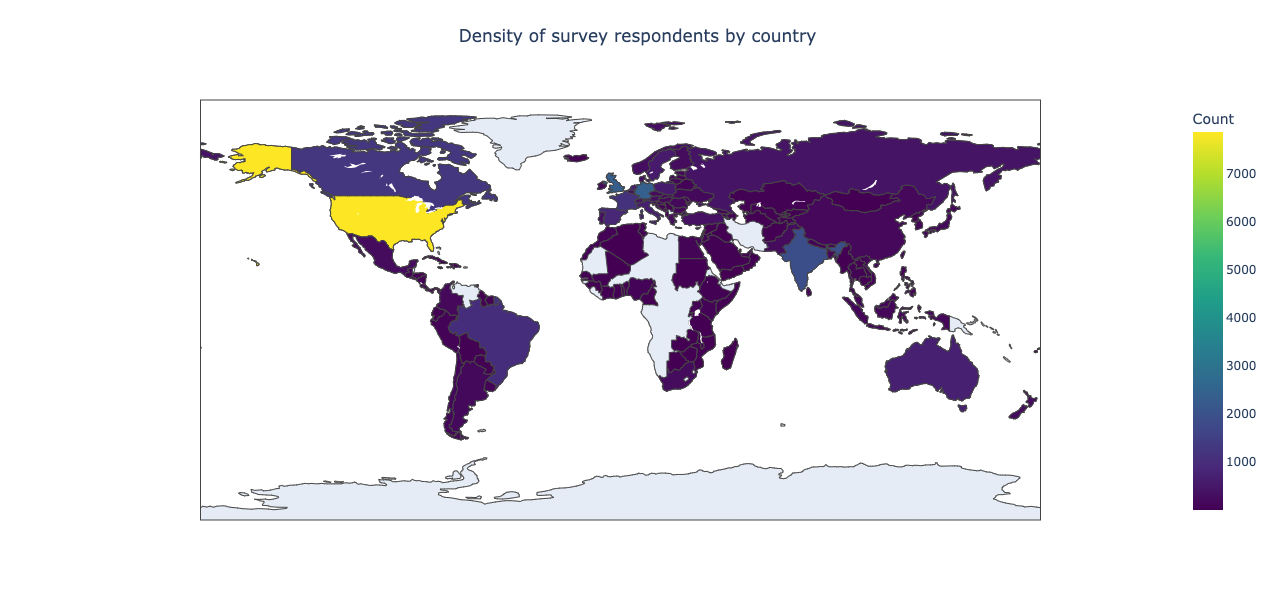

In [111]:
# Count occurrences of each country name
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# print(country_counts)

# Function to get country code from country name
def get_country_code(name):
    try:
        return pycountry.countries.search_fuzzy(name)[0].alpha_3
    except:
        return None

# Apply the function to create the 'Country_code' column
country_counts['Country_code'] = country_counts['Country'].apply(get_country_code)

# Create a choropleth map using Plotly Express
fig = px.choropleth(
    country_counts,
    locations='Country_code',  # Column containing country codes
    color='Count',             # Column containing data values (occurrences)
    hover_name='Country',      # Column for hover information (country names)
    # color_continuous_scale='YlOrRd',
    color_continuous_scale='Viridis',
    title='Survey respondents by country',
    width=800,                 # Set the width of the plot
    height=600                 # Set the height of the plot
)

# Center the title horizontally and vertically
fig.update_layout(
    title='Density of survey respondents by country',
    title_x=0.5,  # Center title horizontally
    title_y=0.95  # Center title vertically
)

# Show the map
fig.show()

> <span style='font-size:18px'>The United States of America stands out as the country with the highest number of survey responses (__25.2%__), totaling 7879. This country is highlighted in yellow on the figure above. The top 5 countries, ranked by the number of survey respondents, are as follows: United States of America, Germany, United Kingdom of Great Britain and Northern Ireland, India, Canada.</span> 


In [112]:
df['Country'].value_counts().nlargest(5)

United States of America                                7879
Germany                                                 2391
United Kingdom of Great Britain and Northern Ireland    2348
India                                                   1886
Canada                                                  1251
Name: Country, dtype: int64

In [113]:
print(f'Percentage of respondents for the top country is: ',round(df['Country'].value_counts()[0]/len(df['Country'])*100),2)

Percentage of respondents for the top country is:  25 2


### Salary Distribution

(29037, 265)


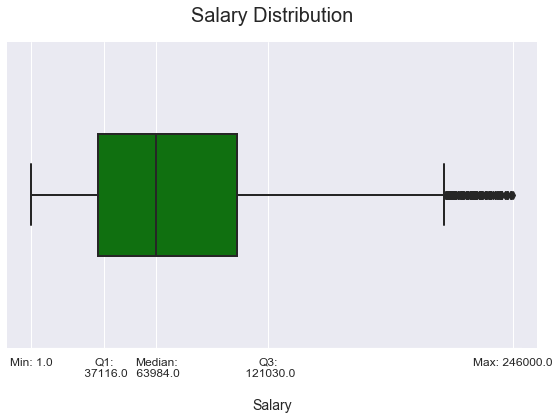

In [114]:
# Calculate the IQR for outliers 
Q1 = df['SalaryUSD'].quantile(0.25)
Q3 = df['SalaryUSD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_outl = df[(df['SalaryUSD'] >= lower_bound) & (df['SalaryUSD'] <= upper_bound)]
print(df_outl.shape)

# Set Seaborn style
sns.set(style="darkgrid")

# Create a box plot with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x=df_outl['SalaryUSD'], orient="h", color='green', width=0.4, linewidth=2, fliersize=5)
sns.despine(left=True, trim=True)

# Calculate and add x ticks for quartiles and median
median = df_outl['SalaryUSD'].median()
ticks = [df_outl['SalaryUSD'].min(), Q1, median, Q3, df_outl['SalaryUSD'].max()]
tick_labels = [f'Min: {ticks[0]}', f'Q1:\n {Q1}', f'Median:\n {median}', f'Q3:\n {Q3}', f'Max: {ticks[4]}']
plt.xticks(ticks, tick_labels, fontsize=12)

plt.xlabel('Salary', fontsize=14,labelpad=20)
plt.title('Salary Distribution', fontsize=20,pad=20)
plt.tight_layout()
plt.show()


#### Data Scientist/ML Specialists Median Salary

In [115]:
df_DSML = df_outl[df_outl['DevType_Data_scientist_or_machine_learning_specialist']==1]
df_DSML['SalaryUSD'].median()

69102.0

In [116]:
df_DSML.shape

(1514, 265)

In [117]:
df_DSML.groupby('EdLevel')['SalaryUSD'].median()

EdLevel
Associate       92300.0
Bachelors       56940.0
Doctorate       89580.5
Masters         63986.0
No Degree       74651.0
Professional    47989.5
Name: SalaryUSD, dtype: float64

In [118]:
# df_DSML2 = df[df['DevType_Data_scientist_or_machine_learning_specialist']==1]
# df_DSML2['SalaryUSD'].median()

### Gender vs Salary

In [119]:
df_DSML.groupby('Gender')['SalaryUSD'].median()


Gender
Man      68677.0
Other    84091.0
Woman    61179.5
Name: SalaryUSD, dtype: float64

In [120]:
df_male_female = df[df['Gender'].isin(['Man', 'Woman'])]


In [121]:
df_male_female = df_DSML[df_DSML['Gender'].isin(['Man', 'Woman'])]

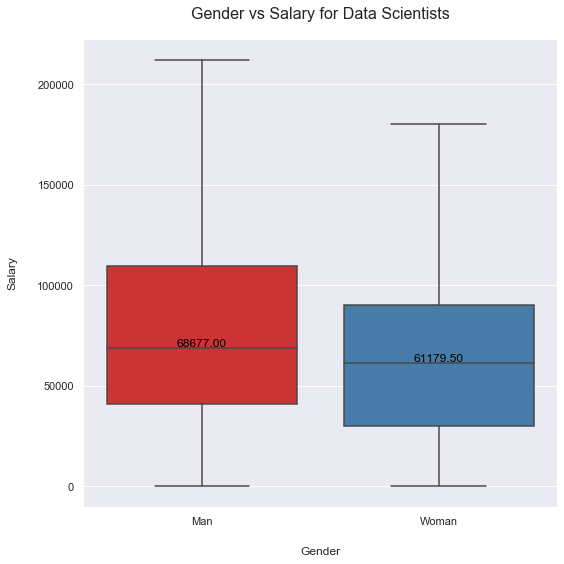

In [122]:
# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

gender_order = ['Man', 'Woman']
# Create box plots (With and Without Outliers)
plt.figure(figsize=(8, 8))

# # Box plot with outliers
# plt.subplot(1, 2, 1)
# sns.boxplot(x='Gender', y='SalaryUSD', data=df_male_female, palette='Set1')
# plt.title('Gender vs Salary for Data Scientists', fontsize=16, pad=20)
# plt.xlabel('Gender', fontsize=12, labelpad=20)
# plt.ylabel('Salary', fontsize=12, labelpad=20)

# Box plot without outliers
# plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='SalaryUSD', data=df_male_female, palette='Set1', showfliers=False)
plt.title('Gender vs Salary for Data Scientists', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Salary', fontsize=12, labelpad=20)

# Add median ticks
medians = df_male_female.groupby('Gender')['SalaryUSD'].median()
# tick_labels = [f"Median: {median:.2f}" for median in medians]
# plt.xticks([0, 1], tick_labels)
# medians.index = edlevel_order  # Use the specified order
for i, label in enumerate(gender_order):
    ax_value = medians[label]
    plt.text(i, ax_value, f'{ax_value:.2f}', ha='center', va='bottom', color='black', fontsize=12)


plt.tight_layout()
plt.savefig('gendersalaryDS.png', bbox_inches='tight')
plt.show()

In [123]:
df['EdLevel']

0          Masters
1        Bachelors
2          Masters
3        Bachelors
4        Bachelors
           ...    
31497    Bachelors
31498    Bachelors
31499    Bachelors
31500    Bachelors
31501      Masters
Name: EdLevel, Length: 31502, dtype: object

In [124]:
df.groupby('EdLevel')['SalaryUSD'].median()

EdLevel
Associate       69318.0
Bachelors       70771.0
Doctorate       87948.0
Masters         70206.0
No Degree       59679.0
Professional    43724.0
Name: SalaryUSD, dtype: float64

In [125]:
# # Set Seaborn style
# sns.set(style="darkgrid",context='notebook')

# # Create a scatter plot
# plt.figure(figsize=(8, 6))
# scatter = sns.scatterplot(x='Gender', y='SalaryUSD', data=df, hue='Gender', palette='Set1', s=100)
# plt.title('Scatter Plot of Salary vs Gender', fontsize=20,pad=20)
# plt.xlabel('Gender', fontsize=14,labelpad=20)
# plt.ylabel('Salary', fontsize=14,labelpad=20)
# # Move the legend outside
# legend = scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Gender')
# plt.tight_layout()
# plt.show()

In [126]:
# # Set Seaborn style
# sns.set(style="whitegrid")

# # Create a box plot
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='Gender', y='SalaryUSD', data=df_outl, palette='Set1')
# plt.title('Salary vs Gender',fontsize=20,pad=20)
# plt.xlabel('Gender', fontsize=16,labelpad=20)
# plt.ylabel('Salary')
# plt.tight_layout()
# plt.show()

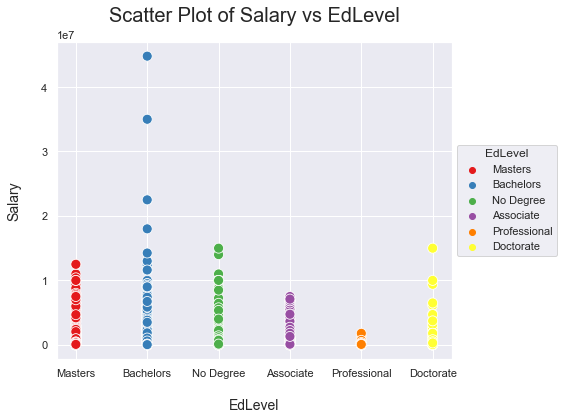

In [127]:
# Set Seaborn style
sns.set(style="darkgrid", context='notebook')
# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='EdLevel', y='SalaryUSD', data=df, hue='EdLevel', palette='Set1', s=100)
plt.title('Scatter Plot of Salary vs EdLevel', fontsize=20,pad=20)
plt.xlabel('EdLevel', fontsize=14,labelpad=20)
plt.ylabel('Salary', fontsize=14,labelpad=20)
# Move the legend outside
legend = scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='EdLevel')
plt.tight_layout()
plt.show()

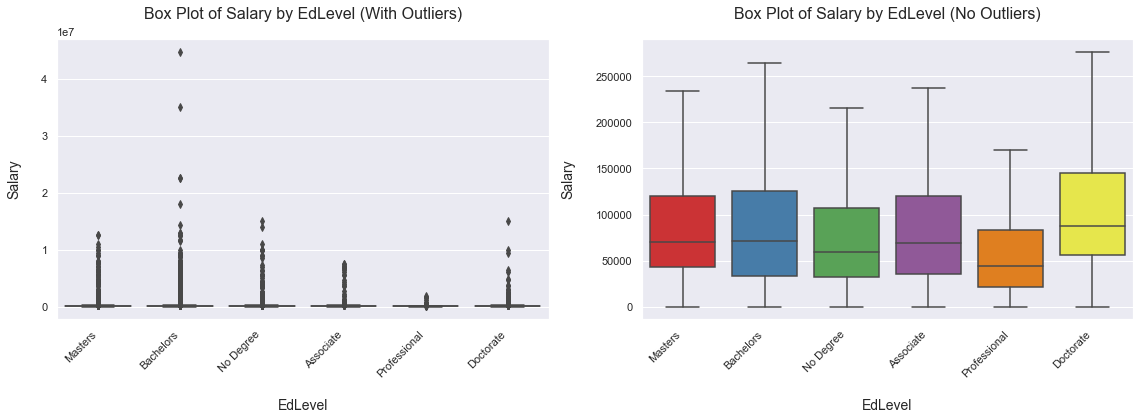

In [128]:
# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box Plot with Outliers
sns.boxplot(x='EdLevel', y='SalaryUSD', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Box Plot of Salary by EdLevel (With Outliers)', fontsize=16, pad=20)
axes[0].set_xlabel('EdLevel', fontsize=14, labelpad=20)
axes[0].set_ylabel('Salary', fontsize=14, labelpad=20)

# Box Plot without Outliers
sns.boxplot(x='EdLevel', y='SalaryUSD', data=df, palette='Set1', showfliers=False, ax=axes[1])
axes[1].set_title('Box Plot of Salary by EdLevel (No Outliers)', fontsize=16, pad=20)
axes[1].set_xlabel('EdLevel', fontsize=14, labelpad=20)
axes[1].set_ylabel('Salary', fontsize=14, labelpad=20)

# Rotate x-axis labels for better visibility
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

EdLevel
Associate       69318.0
Bachelors       70771.0
Doctorate       87948.0
Masters         70206.0
No Degree       59679.0
Professional    43724.0
Name: SalaryUSD, dtype: float64


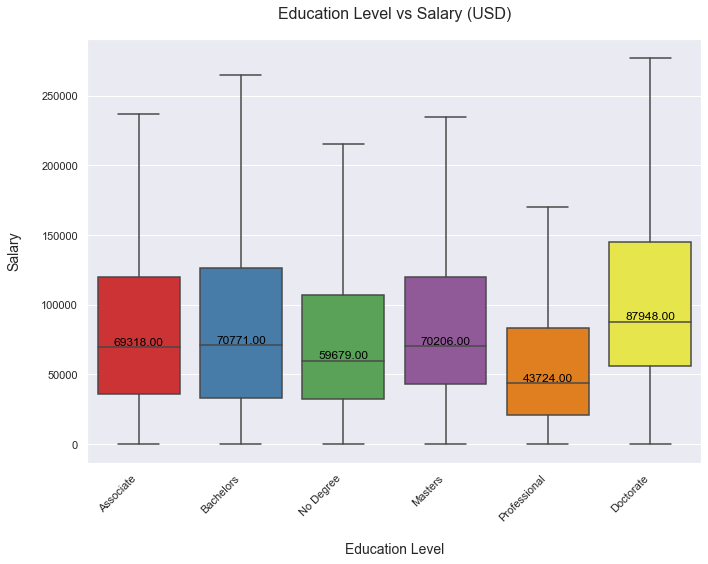

In [129]:
# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

# Specify the desired order of 'EdLevel' values
edlevel_order = ['Associate','Bachelors', 'No Degree', 'Masters', 'Professional', 'Doctorate']  # Add other categories as needed

# Create a figure
plt.figure(figsize=(10,8))

# Create a box plot without outliers, specifying the order of categories
sns.boxplot(x='EdLevel', y='SalaryUSD', data=df, palette='Set1', showfliers=False, order=edlevel_order)

# Add title and labels
plt.title('Education Level vs Salary (USD)', fontsize=16, pad=20)
plt.xlabel('Education Level', fontsize=14, labelpad=20)
plt.ylabel('Salary', fontsize=14, labelpad=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, horizontalalignment='right')

# Calculate and annotate the median values
medians = df.groupby('EdLevel')['SalaryUSD'].median()
print(df.groupby('EdLevel')['SalaryUSD'].median())
# medians.index = edlevel_order  # Use the specified order
for i, label in enumerate(edlevel_order):
    ax_value = medians[label]
    plt.text(i, ax_value, f'{ax_value:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.savefig('edusalary.png', bbox_inches='tight')
plt.show()

EdLevel
Associate       92300.0
Bachelors       56940.0
Doctorate       89580.5
Masters         63986.0
No Degree       74651.0
Professional    47989.5
Name: SalaryUSD, dtype: float64


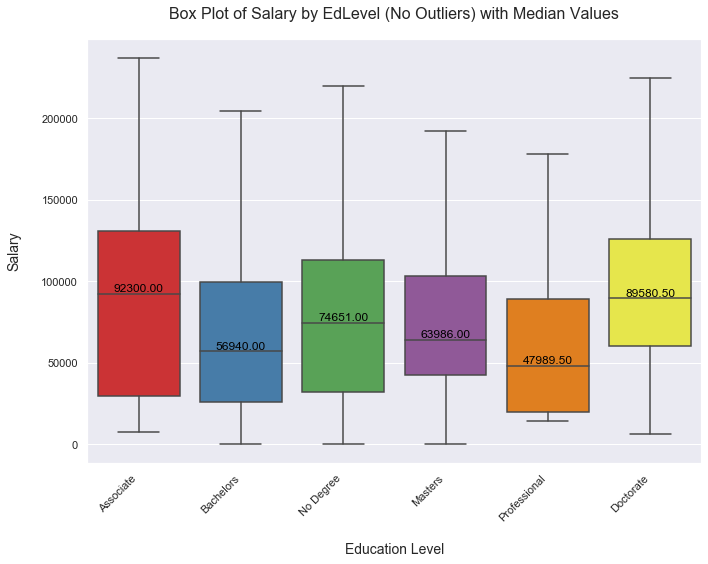

In [130]:
# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

# Set Seaborn style
sns.set(style="darkgrid", context='notebook')

# Specify the desired order of 'EdLevel' values
edlevel_order = ['Associate','Bachelors', 'No Degree', 'Masters', 'Professional', 'Doctorate']  # Add other categories as needed

# Create a figure
plt.figure(figsize=(10,8))

# Create a box plot without outliers, specifying the order of categories
sns.boxplot(x='EdLevel', y='SalaryUSD', data=df_DSML, palette='Set1', showfliers=False, order=edlevel_order)

# Add title and labels
plt.title('Box Plot of Salary by EdLevel (No Outliers) with Median Values', fontsize=16, pad=20)
plt.xlabel('Education Level', fontsize=14, labelpad=20)
plt.ylabel('Salary', fontsize=14, labelpad=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, horizontalalignment='right')

# Calculate and annotate the median values
medians = df_DSML.groupby('EdLevel')['SalaryUSD'].median()
print(df_DSML.groupby('EdLevel')['SalaryUSD'].median())
# medians.index = edlevel_order  # Use the specified order
for i, label in enumerate(edlevel_order):
    ax_value = medians[label]
    plt.text(i, ax_value, f'{ax_value:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.tight_layout()
plt.savefig('edusalaryDS.png', bbox_inches='tight')
plt.show()

> <span style='font-size:18px'>The median salary for developers with a bachelor's degree is __\$70,771__ , which is very similar to the median salary of developers with a master's degree, at __\$70,206__. In contrast, developers with a doctorate have the highest median salary, which is __\$87,948__. </span> 

### Which type of developers provided reponse to the survey most?

In [131]:
devtype_cols = [col for col in df.columns if col.startswith('DevType_')]

def calc_percentage(x):
    return round((x.sum()/len(x)),2)

DevType_share = df[devtype_cols].apply(lambda x: calc_percentage(x)).sort_values(ascending=False)
DevType_share.index = DevType_share.index.str.replace('DevType_', '')
DevType_share.nlargest(5)

Developer_fullstack                             0.47
Developer_backend                               0.45
Developer_frontend                              0.24
Developer_desktop_or_enterprise_applications    0.15
DevOps_specialist                               0.11
dtype: float64

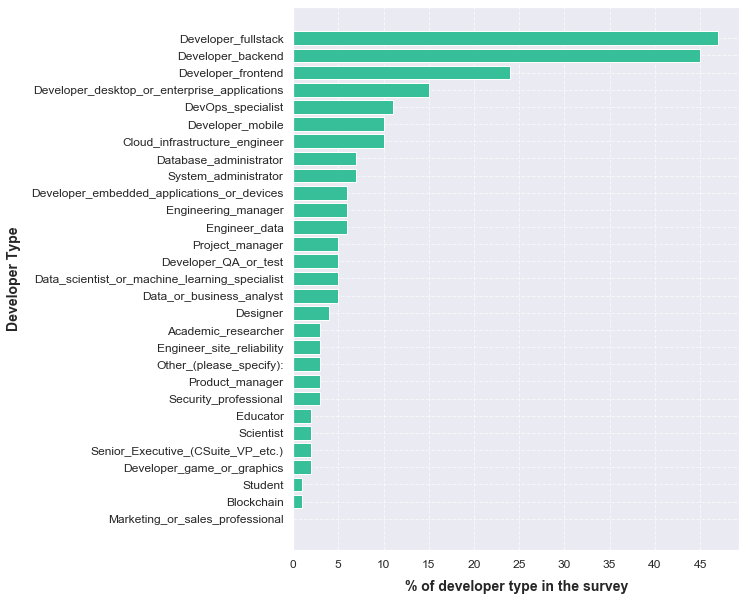

In [132]:
plt.figure(figsize=(8, 10))
plt.barh(DevType_share.index, DevType_share.values*100, color='#36bf99')
plt.xlabel('% of developer type in the survey',labelpad=10, weight='bold', size=14)
plt.ylabel('Developer Type',labelpad=10, weight='bold', size=14)
plt.title('',weight='bold', size=10)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest correlation at the top
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.locator_params(axis='x', nbins=10) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

> <span style='font-size:18px'>Top 4 types of developers that respond to the survey are: Full-stack, back-end, front-end, and desktop developers.</span><br>
We can verify our outcomes with the Stackoverflow 2022 survey report published [here](https://survey.stackoverflow.co/2022#developer-profile-developer-roles)

### Which roles are correlated? 

In [133]:
df2022_DevType = df[devtype_cols]
df2022_DevType.columns = df2022_DevType.columns.str.replace('DevType_', '') 

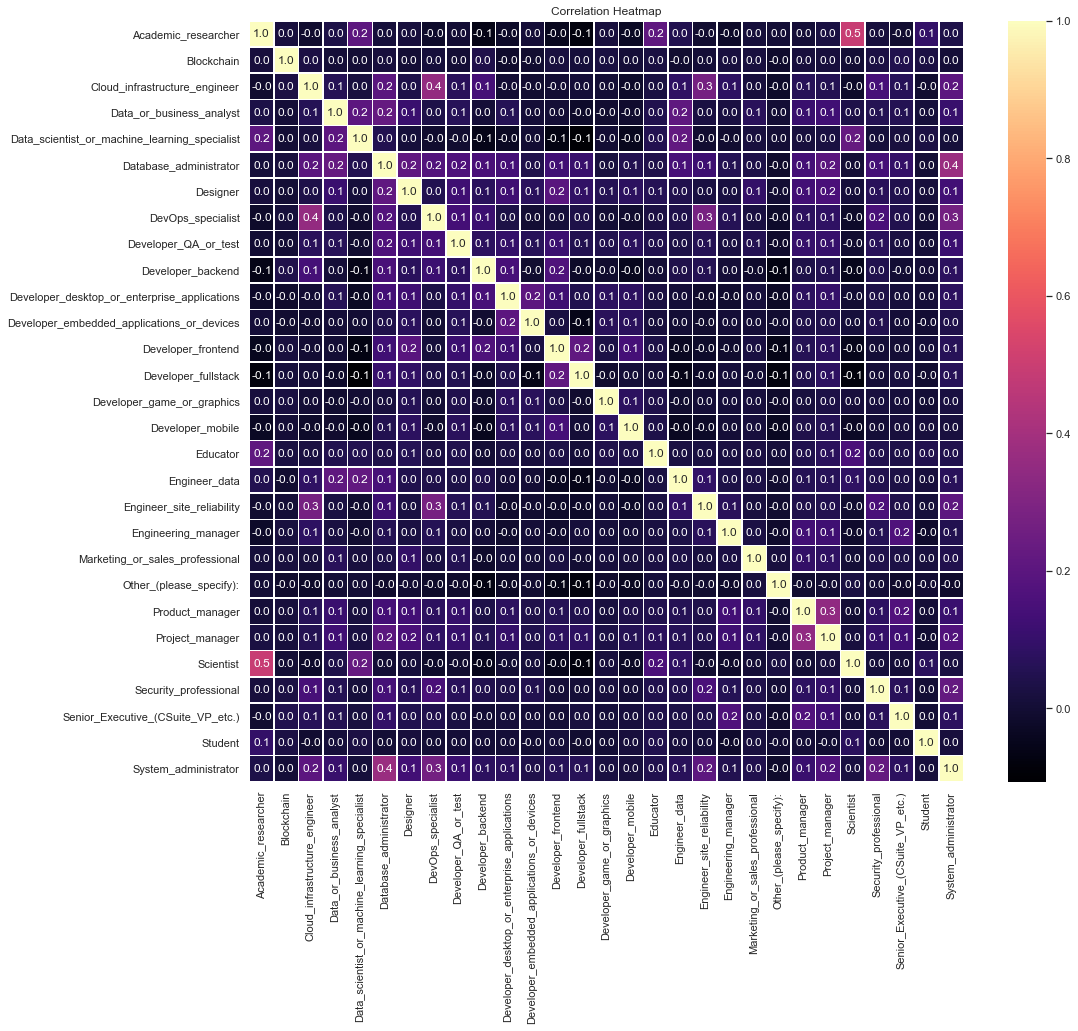

In [134]:
corr_matrix = df2022_DevType.corr()

# Set the figure size
plt.figure(figsize=(16, 14))

# Create a heatmap
sns.heatmap(corr_matrix, cmap='magma', annot=True, fmt=".1f", linewidths=.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

> <span style='font-size:18px'>We found following insights from the above correlation heatmap:</span>
> - There is high correlation between `Academic researcher` and `Scientist` (__correlation 0.5__)
>
> - There is high correlation between `Cloud infrastructure engineer` and `DevOps specialist` (__correlation 0.4__)
>
> - There is high correlation between `Database administrator` and `System administrator` (__correlation 0.4__)

### What roles are mostly correlated with Data Scientists? 
Basically these are the roles that a data scientist may undertake in their current job.

> <span style='font-size:18px'>We found following insights from the above correlation heatmap:</span>
> - There is positive correlation between `Data_scientist_or_machine_learning_specialist` and `Academic researcher` 
(__correlation 0.2__)
> - There is positive correlation between `Data_scientist_or_machine_learning_specialist` and `Data or business_analyst` (__correlation 0.2__)
> - There is positive correlation between `Data_scientist_or_machine_learning_specialist` and `Data Engineer` (__correlation 0.2__)
> - There is positive correlation between `Data_scientist_or_machine_learning_specialist` and `Scientist` (__correlation 0.2__)
</span>

### What additional developer roles do `Data_scientist_or_machine_learning_specialist` perform?

In [135]:
df2022_dsml = df2022_DevType[df2022_DevType['Data_scientist_or_machine_learning_specialist']==1].mean().sort_values(ascending=False)
df2022_dsml.nlargest(10)

Data_scientist_or_machine_learning_specialist    1.000000
Developer_backend                                0.334940
Engineer_data                                    0.281325
Developer_fullstack                              0.246988
Data_or_business_analyst                         0.230120
Academic_researcher                              0.181928
Scientist                                        0.172892
Database_administrator                           0.127108
Cloud_infrastructure_engineer                    0.119277
Developer_frontend                               0.111446
dtype: float64

In [136]:
df_ds = df2022_DevType[df2022_DevType['Data_scientist_or_machine_learning_specialist']==1]
df_ds.sum().sort_values(ascending=False).nlargest(10)

Data_scientist_or_machine_learning_specialist    1660
Developer_backend                                 556
Engineer_data                                     467
Developer_fullstack                               410
Data_or_business_analyst                          382
Academic_researcher                               302
Scientist                                         287
Database_administrator                            211
Cloud_infrastructure_engineer                     198
Developer_frontend                                185
dtype: int64

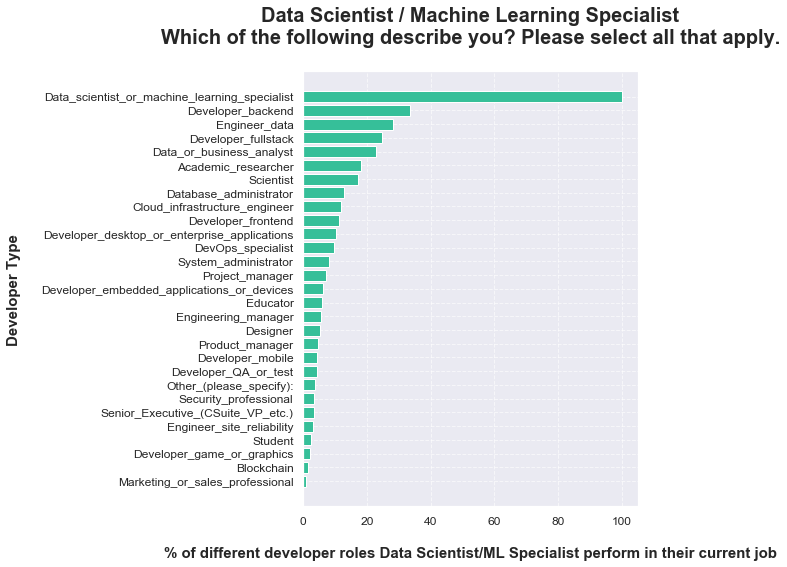

In [137]:
plt.figure(figsize=(6, 8))
plt.barh(df2022_dsml.index, df2022_dsml.values*100, color='#36bf99')
plt.xlabel('% of different developer roles Data Scientist/ML Specialist perform in their current job',labelpad=20, weight='bold', size=15)
plt.ylabel('Developer Type',labelpad=20, weight='bold', size=15)
plt.title('Data Scientist / Machine Learning Specialist\nWhich of the following describe you? Please select all that apply.\n',weight='bold', size=20)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest correlation at the top
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.locator_params(axis='x', nbins=10) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('dsroles.png', bbox_inches='tight')
plt.show()

In [138]:
print(f'From 2022 survey, {round(len(df_ds)/len(df2022_DevType)*100,2)}% of all survey respondents perform the role of Data Scientists or Machine Learning specialists')

From 2022 survey, 5.27% of all survey respondents perform the role of Data Scientists or Machine Learning specialists


In [139]:
print(f'On average, Data Scientists or Machine Learning specialists perform {round(df2022_dsml.sum()-1,2)} additional developer roles.')

On average, Data Scientists or Machine Learning specialists perform 2.73 additional developer roles.


> ### Data Scientists or Machine Learning specialists do perform additional developer roles. 
Most popular developer roles performed by Data Scientists or Machine Learning specialists are as follows:
>- `Developer backend`: 33.49%
>- `Engineer data`: 28.13%
>- `Developer fullstack`: 24.69%
>- `Data or business analyst`: 23.01%

### Which languages do Data Scientists typically use the most?

In [140]:
#find all LanguageHaveWorkedWith where 'DevType_Data_scientist_or_machine_learning_specialist' is 1
data_scientists = df[df['DevType_Data_scientist_or_machine_learning_specialist'] == 1]
programming_languages_columns = [col for col in df.columns if col.startswith('LanguageHaveWorkedWith_')]
languages_worked_with_by_ds = data_scientists[programming_languages_columns]
languages_worked_with_by_ds.head(2)

LanguageHaveWorkedWith_APL  LanguageHaveWorkedWith_Assembly  \
0                            0                                0   
15                           0                                0   

    LanguageHaveWorkedWith_Bash_Shell  LanguageHaveWorkedWith_C  \
0                                   0                         0   
15                                  1                         0   

    LanguageHaveWorkedWith_C#  LanguageHaveWorkedWith_C++  \
0                           1                           1   
15                          0                           0   

    LanguageHaveWorkedWith_COBOL  LanguageHaveWorkedWith_Clojure  \
0                              0                               0   
15                             0                               0   

    LanguageHaveWorkedWith_Crystal  LanguageHaveWorkedWith_Dart  ...  \
0                                0                            0  ...   
15                               0                            0  ...   

    LanguageHaveWorkedWith_R  LanguageHaveWorkedWith_Ruby  \
0                          0                            0   
15                         0                            0   

    LanguageHaveWorkedWith_Rust  LanguageHaveWorkedWith_SAS  \
0                             0                           0   
15                            0                           0   

    LanguageHaveWorkedWith_SQL  LanguageHaveWorkedWith_Scala  \
0                            0                             0   
15                           1                             0   

    LanguageHaveWorkedWith_Solidity  LanguageHaveWorkedWith_Swift  \
0                                 0                             0   
15                                0                             0   

    LanguageHaveWorkedWith_TypeScript  LanguageHaveWorkedWith_VBA  
0                                   0                           0  
15                                  0                           0  

[2 rows x 42 columns]

In [141]:
df2022_lang_ds_percentage = languages_worked_with_by_ds.mean().sort_values(ascending=False)
#Removing prefix just to make the plot look more readable!
df2022_lang_ds_percentage.index = df2022_lang_ds_percentage.index.str.replace('LanguageHaveWorkedWith_', '')

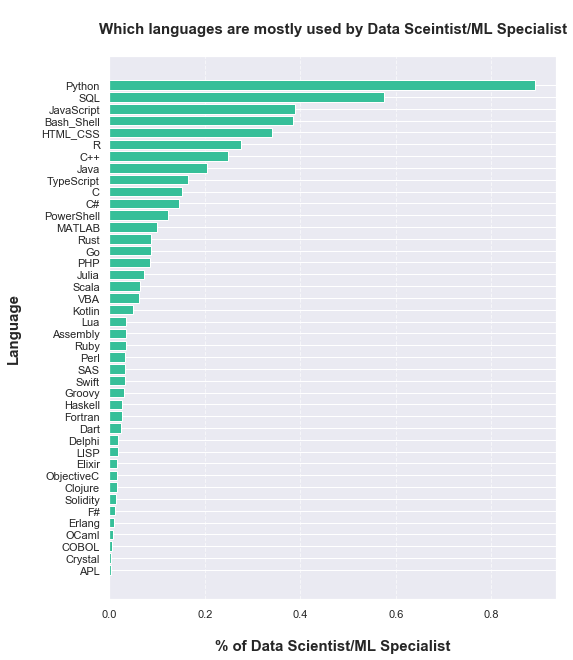

In [142]:
# Create a bar chart
plt.figure(figsize=(8, 10))
plt.barh(df2022_lang_ds_percentage.index, df2022_lang_ds_percentage.values, color='#36bf99')
plt.xlabel('% of Data Scientist/ML Specialist',labelpad=20, weight='bold', size=15)
plt.ylabel('Language',labelpad=20, weight='bold', size=15)
plt.title('\nWhich languages are mostly used by Data Sceintist/ML Specialist\n',weight='bold', size=15)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest correlation at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('popularlang.png', bbox_inches='tight')
plt.show()

In [143]:
df2022_lang_ds_percentage.nlargest(5)

Python        0.890964
SQL           0.575904
JavaScript    0.389759
Bash_Shell    0.385542
HTML_CSS      0.340964
dtype: float64

According to 2022 survey, Data Scientist or Machine Learning Specialists use 4.95 languages on average.

> ### Python is by far the most popular language used by Data Scientists or Machine Learning specialists.
Data Scientists or Machine Learning specialists use 4.95 languages on average. 
Top 5 popular languages used by Data Scientists or Machine Learning specialists are as follows:
>- `Python`: 89.09%
>- `SQL`: 57.59%
>- `Javascript`: 38.97%
>- `Bash shell`: 38.55%
>- `HTML CSS`: 34.09%

### Which programming languages do Data Scientists want to work with the most?

In [144]:
#find all LanguageWantToWorkWith where 'DevType_Data_scientist_or_machine_learning_specialist' is 1
data_scientists = df[df['DevType_Data_scientist_or_machine_learning_specialist'] == 1]
programming_languages_want_columns = [col for col in df.columns if col.startswith('LanguageWantToWorkWith_')]
languages_want_by_ds = data_scientists[programming_languages_want_columns]
languages_want_by_ds.head(2)

LanguageWantToWorkWith_APL  LanguageWantToWorkWith_Assembly  \
0                            0                                0   
15                           0                                0   

    LanguageWantToWorkWith_Bash_Shell  LanguageWantToWorkWith_C  \
0                                   0                         0   
15                                  1                         0   

    LanguageWantToWorkWith_C#  LanguageWantToWorkWith_C++  \
0                           1                           1   
15                          0                           0   

    LanguageWantToWorkWith_COBOL  LanguageWantToWorkWith_Clojure  \
0                              0                               0   
15                             0                               0   

    LanguageWantToWorkWith_Crystal  LanguageWantToWorkWith_Dart  ...  \
0                                0                            0  ...   
15                               0                            0  ...   

    LanguageWantToWorkWith_R  LanguageWantToWorkWith_Ruby  \
0                          0                            0   
15                         0                            0   

    LanguageWantToWorkWith_Rust  LanguageWantToWorkWith_SAS  \
0                             0                           0   
15                            0                           0   

    LanguageWantToWorkWith_SQL  LanguageWantToWorkWith_Scala  \
0                            0                             0   
15                           1                             0   

    LanguageWantToWorkWith_Solidity  LanguageWantToWorkWith_Swift  \
0                                 0                             0   
15                                0                             0   

    LanguageWantToWorkWith_TypeScript  LanguageWantToWorkWith_VBA  
0                                   1                           0  
15                                  0                           0  

[2 rows x 42 columns]

In [145]:
df2022_lang_want_ds_percentage = languages_want_by_ds.mean().sort_values(ascending=False)
#Removing prefix just to make the plot look more readable!
df2022_lang_want_ds_percentage.index = df2022_lang_want_ds_percentage.index.str.replace('LanguageWantToWorkWith_', '')

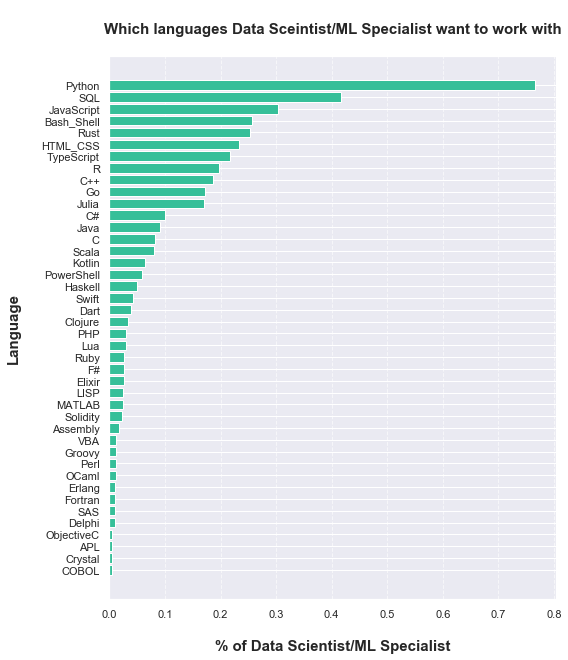

In [146]:
# Create a bar chart
plt.figure(figsize=(8,10))
plt.barh(df2022_lang_want_ds_percentage.index, df2022_lang_want_ds_percentage.values, color='#36bf99')
plt.xlabel('% of Data Scientist/ML Specialist',labelpad=20, weight='bold', size=15)
plt.ylabel('Language',labelpad=20, weight='bold', size=15)
plt.title('\nWhich languages Data Sceintist/ML Specialist want to work with\n',weight='bold', size=15)
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest correlation at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('wantpopularlang.png', bbox_inches='tight')
plt.show()

In [147]:
round(df2022_lang_want_ds_percentage*100,2).nlargest(6)

Python        76.51
SQL           41.69
JavaScript    30.36
Bash_Shell    25.66
Rust          25.36
HTML_CSS      23.37
dtype: float64

> ### `Rust` is getting popular! It's among the top 5 popular languages that Data Scientists or Machine Learning specialists want to work with over the next year.
Top 5 popular languages Data Scientists or Machine Learning specialists want to work with are as follows:
>- `Python`: 76.51%
>- `SQL`: 41.69%
>- `Javascript`: 30.36%
>- `Bash shell`: 25.66%
>- `Rust`: 25.36%

### Gender vs Country

In [148]:
all = df.groupby(['Country','Gender']).size().reset_index(name ='Count')
all['Total'] = all.groupby(['Country'])['Count'].transform('sum')
all = all.sort_values(by=['Total'], ascending=False)
#all.set_index('Total')
Top = all[:15].sort_values(by=['Total'], ascending=False)
Top

Country Gender  Count  Total
296                           United States of America  Woman    514   7879
295                           United States of America  Other    217   7879
294                           United States of America    Man   7148   7879
96                                             Germany  Woman     88   2391
95                                             Germany  Other     53   2391
94                                             Germany    Man   2250   2391
291  United Kingdom of Great Britain and Northern I...  Other     79   2348
290  United Kingdom of Great Britain and Northern I...    Man   2145   2348
292  United Kingdom of Great Britain and Northern I...  Woman    124   2348
115                                              India    Man   1796   1886
117                                              India  Woman     83   1886
116                                              India  Other      7   1886
47                                              Canada  Woman     67   1251
45                                              Canada    Man   1155   1251
46                                              Canada  Other     29   1251

In [149]:
# from raw value to percentage
total = Top.groupby(['Country'])['Count'].sum().reset_index()
total['Percentage'] = [i / j * 100 for i,j in zip(total['Count'], total['Count'])]

woman = Top[Top.Gender=='Woman'].groupby(['Country'])['Count'].sum().reset_index()
woman['Percentage'] = [i / j * 100 for i,j in zip(woman['Count'], total['Count'])]
woman.sort_values(by=['Percentage'], ascending=False, inplace=True)

In [150]:
woman

Country  Count  Percentage
4                           United States of America    514    6.523671
0                                             Canada     67    5.355715
3  United Kingdom of Great Britain and Northern I...    124    5.281090
2                                              India     83    4.400848
1                                            Germany     88    3.680468

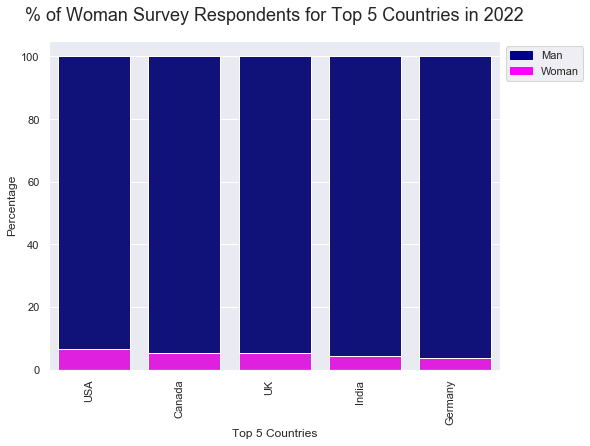

In [151]:
fig, ax = plt.subplots(figsize = (8,6))

# bar chart 1 -> top bars (group of 'Man')
bar1 = sns.barplot(x="Country",  y="Percentage", data=total, color='darkblue')
# bar chart 2 -> bottom bars (group of 'Woman')
bar2 = sns.barplot(x="Country", y="Percentage", data=woman, color='magenta')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Man')
bottom_bar = mpatches.Patch(color='magenta', label='Woman')
plt.legend(handles=[top_bar, bottom_bar])

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

ax.set_ylabel('Percentage', fontsize = 12)
ax.set_xlabel('Top 5 Countries', fontsize = 12)

# Rename x-axis values and replace "United Kingdom" with "UK"
new_labels = ['USA', 'Canada', 'UK', 'India', 'Germany']
ax.set_xticklabels(new_labels, rotation=45, ha='right')

plt.title('% of Woman Survey Respondents for Top 5 Countries in 2022', fontsize = 18,pad=20)
plt.xticks(rotation=90)
plt.tight_layout(pad=0., w_pad=-16.5, h_pad=0.0)  
plt.savefig('genderresponse.png', bbox_inches='tight')
plt.show()

> ### Percentage of female respondents is very low (__upto 6.02%__ for USA) for the top 5 countries with largest number of respondents. 
USA, Canada, UK, India and Germany are the countries with largest number of respondents. Partcipants on the survey is dominated by male respondents, as percentage of female respondents are extremely low. Percentage of female respondents for top 5 countries are given below:
>- `USA`: 6.02%
>- `Canada`: 5.03%
>- `UK`: 5.02%
>- `India`: 4.29%
>- `Germany`: 3.51%

## Machine Learning

In [152]:
df2022 = pd.read_csv('./data/survey_results_public_2022.csv')
df2022.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [153]:
col=['MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
        'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity',
       'Accessibility', 'MentalHealth', 'TBranch', 'ICorPM', 'WorkExp',
       'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4',
       'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Frequency_1',
       'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering',
       'Onboarding', 'ProfessionalTech', 'TrueFalse_1', 'TrueFalse_2',
       'TrueFalse_3', 'SurveyLength', 'SurveyEase','ConvertedCompYearly']

df = df2022[col]
df.shape

(73268, 74)

In [154]:
#categorical columns
cat_vars = df.select_dtypes(include=['object']).copy().columns


#### Fix missing values

In [155]:
columns_with_nan = df.columns[df.isna().any()].tolist()

if len(columns_with_nan) > 0:
    print("Columns with NaN values:", columns_with_nan)
else:
    print("No columns have NaN values in xtrain.")

Columns with NaN values: ['Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'M

In [156]:
df_copy = df.copy()

In [157]:
df_copy['WorkExp'].isnull().sum()

36499

In [158]:
df_copy['WorkExp'] = df_copy['WorkExp'].fillna(df['WorkExp'].mean())

In [159]:
df_copy['WorkExp'].isnull().sum()

0

In [160]:
def fillna_with_mode(dataframe, columns_to_fill):
    """
    Fill missing values in specified categorical columns with the mode (most frequent value).

    Args:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns_to_fill (list): A list of column names with missing values to be filled with the mode.

    Returns:
    pd.DataFrame: The DataFrame with missing values filled with the mode.
    """
    for column in columns_to_fill:
        mode_value = dataframe[column].mode()[0]  # Get the mode of the column
        dataframe[column].fillna(mode_value, inplace=True)  # Fill missing values with mode
        
    return dataframe

In [161]:
filled_df = fillna_with_mode(df_copy, cat_vars)
filled_df.shape

(73268, 74)

In [162]:
filled_df['ConvertedCompYearly'].isnull().sum()

35197

In [163]:
filled_df = filled_df.dropna(subset=['ConvertedCompYearly'], axis=0)
filled_df['ConvertedCompYearly'].isnull().sum()

0

In [164]:
filled_df.rename(columns={'ConvertedCompYearly': 'SalaryUSD' }, inplace =True)
df_final=filled_df.copy()

/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4290: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Fix outliers in the SalaryUSD column

In [165]:
# Calculate the IQR for outliers 
Q1 = df_final['SalaryUSD'].quantile(0.25)
Q3 = df_final['SalaryUSD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_final = df_final[(df_final['SalaryUSD'] >= lower_bound) & (df_final['SalaryUSD'] <= upper_bound)]
df_final.shape

(35181, 74)

In [166]:
df_final.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'S

In [167]:
survey=df_final

In [168]:
X=survey.drop('SalaryUSD',axis=1)
y=survey['SalaryUSD']

#### Encode categorical columns

In [169]:
def label_encode_columns(dataframe, columns_to_encode):
    """
    Label encode specified categorical columns in a DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns_to_encode (list): A list of column names to be label encoded.

    Returns:
    pd.DataFrame: The DataFrame with specified columns label encoded.
    """
    label_encoder = LabelEncoder()
    for column in columns_to_encode:
        if column in dataframe.columns:
            dataframe[column].fillna(method='ffill', inplace=True)
            dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

In [170]:
X = label_encode_columns(X, cat_vars)

#### Split the data for training and testing

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=42)

In [172]:
X_train.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'Blockchain', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'S

## Model Training 
### Models: 
- <span style='font-size: 16px'>Linear Regression</span>
- <span style='font-size: 16px'>DecisionTreeRegressor</span>
- <span style='font-size: 16px'>RandomForestRegressor</span>

### Evaluation Metrics:
- <span style='font-size: 16px'>Root Mean Squared Error(RMSE)</span>
- <span style='font-size: 16px'>Mean Absolute Error(MAE)</span>
- <span style='font-size: 16px'>R Squared (R2)</span>

#### Linear Regression

In [173]:
LR=LinearRegression()
start = time.time()
train_lr=LR.fit(X_train,y_train)
end = time.time()
runtime_LR = end - start
pred=LR.predict(X_test)
error_rmse_LR=np.sqrt(mean_squared_error(y_test,pred))
error_mae_LR = mean_absolute_error(y_test,pred)
r2_LR = r2_score(y_test, pred)


print("Linear Regression:")
print('RMSE: {:,.02f}'.format(error_rmse_LR))
print('MAE: {:,.02f}'.format(error_mae_LR))
print('R Squared(R2 score): {:,.02f}'.format(r2_LR))
print('Runtime: ',round(runtime_LR,4))


Linear Regression:
RMSE: 42,656.00
MAE: 32,811.70
R Squared(R2 score): 0.36
Runtime:  0.2119


#### DecisionTreeRegressor

In [174]:

Dt=DecisionTreeRegressor(random_state=42) 
start = time.time()
train_dt=Dt.fit(X_train,y_train)
end = time.time()
runtime_DT = end - start
pred_dt=Dt.predict(X_test)

error_rmse_DT=np.sqrt(mean_squared_error(y_test,pred_dt))
error_mae_DT = mean_absolute_error(y_test,pred_dt)
r2_DT = r2_score(y_test, pred_dt)


print("DecisionTreeRegressor:")
print('RMSE: {:,.02f}'.format(error_rmse_DT))
print('MAE: {:,.02f}'.format(error_mae_DT))
print('R Squared(R2 score): {:,.02f}'.format(r2_DT))
print('Runtime: ',round(runtime_DT,4))


DecisionTreeRegressor:
RMSE: 48,750.44
MAE: 34,631.12
R Squared(R2 score): 0.16
Runtime:  0.9599


#### RandomForestRegressor

In [175]:

Rf=RandomForestRegressor(random_state=42) 
start = time.time()
train_rf=Rf.fit(X_train,y_train)
end = time.time()
runtime_RF = end - start
pred_rf=Rf.predict(X_test)

error_rmse_RF=np.sqrt(mean_squared_error(y_test,pred_rf))
error_mae_RF = mean_absolute_error(y_test,pred_rf)
r2_RF = r2_score(y_test, pred_rf)

print("RandomForestRegressor:")
print('RMSE: {:,.02f}'.format(error_rmse_RF))
print('MAE: {:,.02f}'.format(error_mae_RF))
print('R Squared(R2 score): {:,.02f}'.format(r2_RF))
print('Runtime: ',round(runtime_RF,4))

RandomForestRegressor:
RMSE: 33,528.27
MAE: 24,200.56
R Squared(R2 score): 0.60
Runtime:  52.7522


### Model Performance Comparison

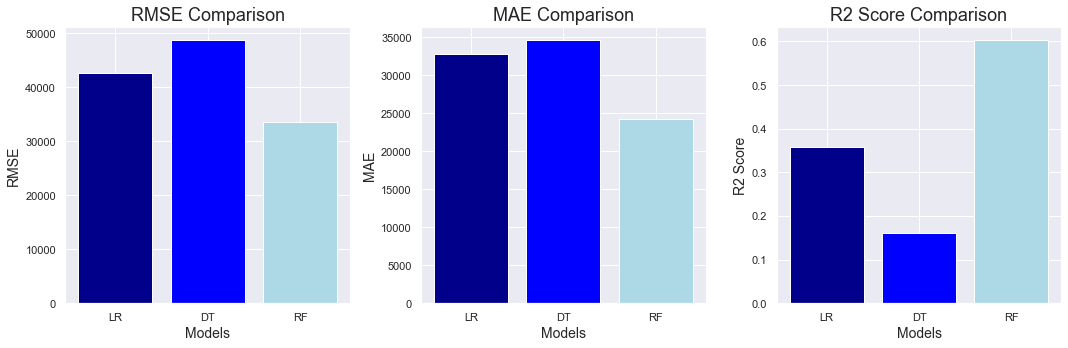

In [176]:
# RMSE, MAE, and R2 values for three regression models
models = ['LR', 'DT', 'RF']  # Replace with your model names
rmse_values = [error_rmse_LR, error_rmse_DT, error_rmse_RF]  # Replace with your RMSE values
mae_values = [error_mae_LR, error_mae_DT, error_mae_RF]  # Replace with your MAE values
r2_values = [r2_LR, r2_DT, r2_RF]  # Replace with your R2 values

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot RMSE
axes[0].bar(models, rmse_values, color=['darkblue', 'blue', 'lightblue'])
axes[0].set_xlabel('Models',fontsize=14)
axes[0].set_ylabel('RMSE',fontsize=14)
axes[0].set_title('RMSE Comparison',fontsize=18)

# Plot MAE
axes[1].bar(models, mae_values, color=['darkblue', 'blue', 'lightblue'])
axes[1].set_xlabel('Models',fontsize=14)
axes[1].set_ylabel('MAE',fontsize=14)
axes[1].set_title('MAE Comparison',fontsize=18)

# Plot R2 Score
axes[2].bar(models, r2_values, color=['darkblue', 'blue', 'lightblue'])
axes[2].set_xlabel('Models',fontsize=14)
axes[2].set_ylabel('R2 Score',fontsize=14)
axes[2].set_title('R2 Score Comparison',fontsize=18)

plt.tight_layout()
plt.show()

In [177]:
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [error_rmse_LR, error_rmse_DT, error_rmse_RF],
    'MAE': [error_mae_LR, error_mae_DT, error_mae_RF],
    'R2 Score': [r2_LR, r2_DT, r2_RF],
    'Runtime (s)': [runtime_LR, runtime_DT, runtime_RF]  # Assuming you have runtime_DT and runtime_RF
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(data)
df_metrics

Model          RMSE           MAE  R2 Score  Runtime (s)
0  Linear Regression  42656.004789  32811.700452  0.358196     0.211945
1      Decision Tree  48750.439115  34631.116059  0.161701     0.959902
2      Random Forest  33528.268851  24200.557614  0.603481    52.752231

> Based on the results presented above, it is evident that the __Random Forest__ model outperformed both the __Linear Regression__ and __Decision Tree__ models in terms of __RMSE__ and __MAE__. Moreover, the __R2 Score__ for the __Random Forest__ model was substantially higher, indicating its superior predictive capability __(R2 Score of 0.60)__ compared to the other models. The R2 score for Linear Regression and Decision Tree models were 0.36 and 0.16, respectively.
>
>However, it's important to note that the __Random Forest__ model incurred a __higher runtime (55.69 s)__, which was longer than that of the other two models (Linear regression .20s, Decision Tree .88s).

## Conclusion

In summary, we conducted a comprehensive analysis of the Stack Overflow Developer Survey for the year 2022, leading to valuable insights. Our analysis encompassed a wide range of aspects, including identifying the country with the highest number of respondents, determining the most popular programming languages, tracking the rise in popularity of specific languages, examining the educational background of participants, exploring the gender distribution among respondents, and investigating the diverse roles held by developers. 
Furthermore, we applied machine learning models to make salary predictions for developers.